In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [2]:
# Read in CSV file

file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
np.random.seed(12)

In [4]:
# Discard all cryptocurrencies not being traded.
inactive_crypto = df[df["IsTrading"]==False].index
df.drop(inactive_crypto, inplace=True)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# Drop IsTrading and CoinName columns.
new_df = df.drop(["Unnamed: 0","IsTrading","CoinName"],axis=1)
new_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Remove all rows that have at least one null value.
new_df = new_df.dropna()
new_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter to keep total coins mined > 0.
no_coins = new_df[new_df["TotalCoinsMined"] <= 0].index

final_df = new_df.drop(no_coins)
final_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
final_df.columns

Index(['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply'], dtype='object')

In [9]:
# Convert columns "Algorithm" and "ProofType" to num data.
# Algorithm_dummies = pd.get_dummies(final_df["Algorithm"])
# ProofType_dummies = pd.get_dummies(final_df["ProofType"])
df_dummies = pd.get_dummies(final_df, columns=["Algorithm","ProofType"])
df_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dimensionality Reduction

In [10]:
# Standardize dataset.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [11]:
# Perform dimensionality reduction with PCA, preserving 90% of explained variance.
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)
pca_transformed_data

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -4.54071721e-15, -3.61326337e-15, -1.80049819e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -5.20798124e-15, -3.38359294e-15, -1.22307755e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         3.85322349e-14,  5.26252506e-14,  7.11391735e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -6.15339842e-14, -1.70117596e-15, -3.50933589e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -3.24801802e-15, -4.78751189e-15,  7.73512550e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -1.06754779e-15, -2.30831427e-15,  4.80115882e-15]])

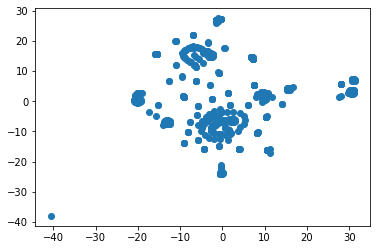

In [12]:
# Further reduce dataset dimensions by running t-SNE on PCA output.
tsne = TSNE(learning_rate=25)
transformed_features = tsne.fit_transform(pca_transformed_data)
# Scatter plot of t-SNE. 
df_dummies['x'] = transformed_features[:,0]
df_dummies['y'] = transformed_features[:,1]
# df2['class'] = df_dummies['Algorithm']

plt.scatter(df_dummies['x'], df_dummies['y'])
plt.show()

C:\Users\annyl\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


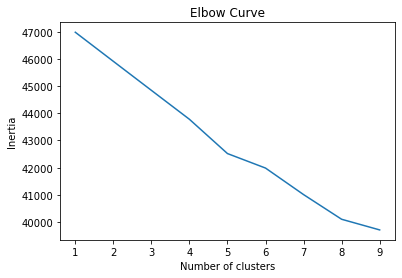

In [13]:
# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformed_data)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(1,10)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)
    # Train the model
    model.fit(data)
    # Predict clusters
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    # data["class"] = model.labels_
    return data

def show_clusters(df):
    plt.scatter(df_dummies['x'], df_dummies['y'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

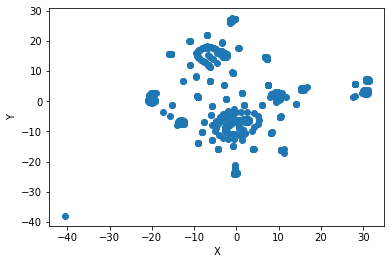

In [15]:
clusters = get_clusters(5, df_dummies) 

show_clusters(clusters) 

Analysis:

Based on both scatterplots as well as the visible elbows in the K-means model, we can be reasonably confident that cryptocurrencies can be split into 5 major clusters, with a maximum of 8 clusters if further subdivided. The outlier cluster should not be included in any investment offerings until further analysis can be completed.